# Problem 1: Temperature Map (8 points)

In this problem, we will work with raster data from the [Finnish Meteorological Institute (FMI)](https://en.ilmatieteenlaitos.fi/), which contains daily average temperatures stored in 10 km by 10 km raster cells. For each year, there is one raster file (we will only work with data from the year 2023), and it contains 365 raster bands—each representing one day of the year, starting from January through to the end of December.

In this exercise, we will work with the raster bands, extract the necessary information, and perform raster calculations.


## (1a) - Read the raster data (1 point)

As the first step read the raster file from data directory `data/tday_2023.tif`. Print the raster metadata. 

In [8]:
import rioxarray
import matplotlib.pyplot as plt
import numpy as np

# Load the multiband raster file
tday_data = rioxarray.open_rasterio("data/tday_2023.tif")

tday_data

<xarray.DataArray (band: 365, y: 116, x: 68)> Size: 12MB
[2879120 values with dtype=float32]
Coordinates:
  * band         (band) int64 3kB 1 2 3 4 5 6 7 ... 359 360 361 362 363 364 365
  * x            (x) float64 544B 6.869e+04 7.869e+04 ... 7.287e+05 7.387e+05
  * y            (y) float64 928B 7.782e+06 7.772e+06 ... 6.642e+06 6.632e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -3.4e+38
    scale_factor:   1.0
    add_offset:     0.0

In [16]:
red_band = tday_data.sel(band=345)
red_band

<xarray.DataArray (y: 116, x: 68)> Size: 32kB
[7888 values with dtype=float32]
Coordinates:
    band         int64 8B 345
  * x            (x) float64 544B 6.869e+04 7.869e+04 ... 7.287e+05 7.387e+05
  * y            (y) float64 928B 7.782e+06 7.772e+06 ... 6.642e+06 6.632e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -3.4e+38
    scale_factor:   1.0
    add_offset:     0.0

## (1b) - Maximum temperatures per day (2 points)

We aim to extract the maximum temperature across the country for each day of summer. Since each day's data is stored as a raster band, we need to iterate through the bands to the desired value — the maximum temperature for that day (i.e., the highest pixel value) from the relevant bands. We will do this only for the Summer, which spans from June 1st (the 152nd day of the year) to August 31st (the 243rd day of the year). 

For each day, print the day number and the maximum temperature using a f-string formatted to two decimal places, like so: `On summer day number --, the maximum temperature in the country is: --`.

In [36]:
max_temp = -np.inf
hottest_day = None
for i in range(0, 244-152):
    day_i = i + 152
    band = tday_data.sel(band=day_i)
    temp = float(band.max().values)
    print(f'On summer day number {day_i}, the max temperature in the country is: {temp:.2f}')
    if temp >= max_temp:
        max_temp = temp
        hottest_day = day_i
    

On summer day number 152, the max temperature in the country is: 10.60
On summer day number 153, the max temperature in the country is: 9.30
On summer day number 154, the max temperature in the country is: 10.90
On summer day number 155, the max temperature in the country is: 12.30
On summer day number 156, the max temperature in the country is: 14.30
On summer day number 157, the max temperature in the country is: 14.00
On summer day number 158, the max temperature in the country is: 13.50
On summer day number 159, the max temperature in the country is: 12.80
On summer day number 160, the max temperature in the country is: 13.00
On summer day number 161, the max temperature in the country is: 13.80
On summer day number 162, the max temperature in the country is: 17.20
On summer day number 163, the max temperature in the country is: 18.40
On summer day number 164, the max temperature in the country is: 18.60
On summer day number 165, the max temperature in the country is: 19.20
On summ

which summer day was the hottest? Just type in the day number in the cell below.

In [35]:
# The hottest summer day, just type in the day number as integrer (and not the date)
print(max_temp)  #replace 0 with the correct value

26.899999618530273


## (1c) - Work with the "hot" raster band (4 points)

Select the band with the hotetst temperature and store it under the variable name `hot_day_raster`. (1 point)

In [41]:
# select your raster band here
hot_day_raster = tday_data.sel(band=hottest_day)

Then run the following cell to mask out the null values from your raster.

In [42]:
import xarray as xr
import numpy as np

hot_day_raster = xr.where(hot_day_raster >= 0, hot_day_raster, np.nan)

Then calculate the following for the selected day (use the same variable names as below): (2 points)

- `average_temp`: a float representing the average temperature.
- A printed temperature range f-string formatted as: `"Temperature is ranging between -- and --"`, with both values rounded to two decimal places.

In [49]:
average_temp = np.nanmean(hot_day_raster.values)
print(average_temp)
min_temp = np.nanmin(hot_day_raster.values)
max_temp = np.nanmax(hot_day_raster.values)
print(f'Temperature is ranging between {min_temp:.2f} and {max_temp:.2f}')

21.008362
Temperature is ranging between 11.30 and 26.90


Now plot your hot day raster. (1 point)

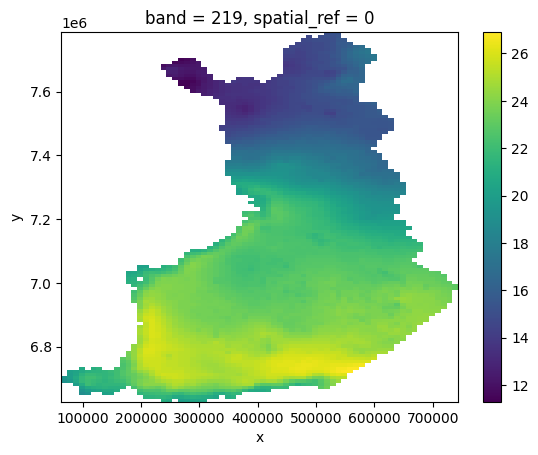

In [50]:
hot_day_raster.plot()

## (1d) - Convert the temperature unit and plot (1 point)

Next, we want to convert the temperatures to degrees Fahrenheit and plot the resulting raster. Name the output raster `hot_day_fahr`.

As we probably remember well from the first period, the conversion formula from Celsius to Fahrenheit is given by:

$$
T_{\text{Fahrenheit}} = T_{\text{Celsius}} \times \frac{9}{5} + 32
$$

Finally, plot the `hot_day_fahr` raster.


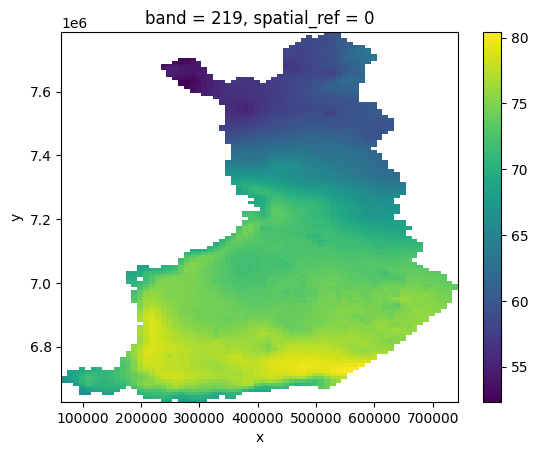

In [59]:
import numpy as np

celc_to_fahrenheit = np.vectorize(lambda x: (x * (9/5)) + 32)

hot_day_fahr = hot_day_raster.copy()
hot_day_fahr.values = celc_to_fahrenheit(hot_day_raster.values)
hot_day_fahr.plot()